<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Linear Regression Review Lab

_Authors: Alexander Combs (NYC)_

---

In [7]:
import numpy as np
import pandas as pd
import random

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

### Create a Python dictionary 

- Use the following as the keys: 'X' and 'Y'
- Create two lists to use as the values in the dictionary: <br>
    for 'X': 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 <br>
    for 'Y': .5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9

In [8]:
# A:
dict = {
    "X": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Y": [.5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9]
}
print(dict)

{'X': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'Y': [0.5, 0.7, 0.8, 0.99, 1, 1.4, 1.8, 2.1, 2.4, 2.9]}


### Using that dictionary, create a pandas DataFrame and call it pre_df

In [9]:
# A:
pre_df = pd.DataFrame(dict)
pre_df.head(10)

,X,Y
0,1,0.50
1,2,0.70
2,3,0.80
3,4,0.99
4,5,1.00
5,6,1.40
6,7,1.80
7,8,2.10
8,9,2.40
9,10,2.90


### Using the Series from the DataFrame, create two new series

- The first list should use the 'X' values and add 10 to each value
- The second list should use the 'Y' values and add 3 to each
- Add those new lists to a new DataFrame and save it as new_data (hint: zip())

Note: the original DataFrame should be unchanged (don't save to pre_df as new columns)

In [10]:
# A:
s1 = pd.Series(pre_df.X)
s1 = s1.add(10)

s2 = pd.Series(pre_df.Y)
s2 = s2.add(3)

new_data = pd.DataFrame(zip(s1, s2))
new_data = new_data.rename(columns={0: "X", 1: "Y"}, errors="raise")
new_data.head(10)

,X,Y
0,11,3.50
1,12,3.70
2,13,3.80
3,14,3.99
4,15,4.00
5,16,4.40
6,17,4.80
7,18,5.10
8,19,5.40
9,20,5.90


### Using pd.concat, vertically concat the new DataFrame, new_data, to the original pre_df DataFrame. Save it as df.

Hint: Be mindful of your column names, and make sure your index is 0-based and continuous.

In [11]:
# A:
pre_df.head()
df = pd.concat([pre_df, new_data])
df.head(20)

,X,Y
0,1,0.50
1,2,0.70
2,3,0.80
3,4,0.99
4,5,1.00
5,6,1.40
6,7,1.80
7,8,2.10
8,9,2.40
9,10,2.90


### Plot the df DataFrame using pandas + matplotlib

- Set the figure size to 12 wide and 6 height
- Add a title, 'X vs Y' to the plot
- Set the size of the markers to 50 and the color of the markers to black

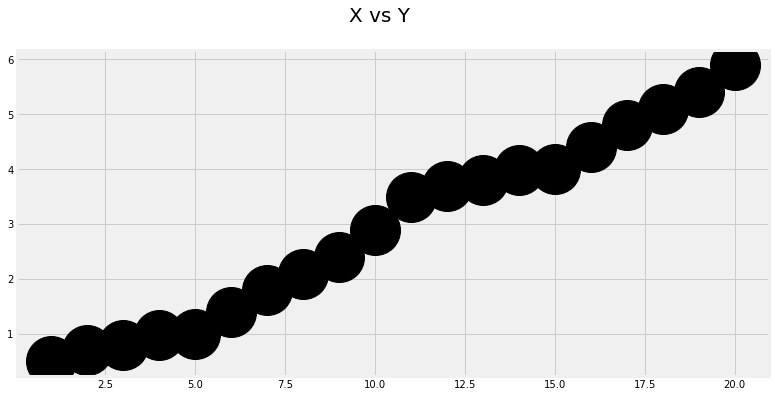

In [12]:
# A:
fig = plt.figure(figsize=(12,6))
fig.suptitle('X vs Y', fontsize=20)
plt.plot(df.X, df.Y, color='black', marker='o', linestyle='solid', linewidth=5, markersize=50)

### Using statsmodels, fit an OLS regression to your data and print our the summary

In [13]:
# A:
import statsmodels.api as sm
#df['intercept'] = 1
model = sm.OLS(df['Y'], sm.add_constant(df['X']))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1271.
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           3.76e-18
Time:                        17:23:17   Log-Likelihood:                 3.9145
No. Observations:                  20   AIC:                            -3.829
Df Residuals:                      18   BIC:                            -1.838
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0857      0.097     -0.880      0.3

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Using the model you fitted, answer the folowing questions:

### What is the R-squared for the model?

In [14]:
# A:
# 0.986

### What is the p-value for your X?

In [15]:
# A:
results.pvalues[0]

0.39070880867893254

### What is the intercept?

In [16]:
# A:
# -0.0857 

### Using the above, write the equation for our model

In [17]:
# A: .29 * x - .0857

### Solve the equation for an x of 20 then 21 (by hand/calculator)

In [18]:
# A:
.29*20 - .0857

5.7143

In [19]:
.29*21 - .0857

6.0043

### Using the predict functionality of statsmodels, predict the values for 20 and 21

Hint: You'll need to use a list - don't forget your intercept!

In [20]:
# A:
import statsmodels.formula.api as smf

smfresults = smf.ols('Y ~ X', df).fit()
df['predict'] = smfresults.predict()
smfresults.predict(pd.DataFrame({'X': [20,21]}))
#df

0    5.713714
1    6.003684
dtype: float64

### Get the SSE by using the predictions for every X (y_hats) and the true y values

In [21]:
# A:
from sklearn import metrics

mse = metrics.mean_squared_error(df['Y'], df['predict'])
sse = mse * len(df)
sse

0.7916793984962409

### Now plot your predictions for every X

- Plot the predictions as a line and the true y values using a scatterplot

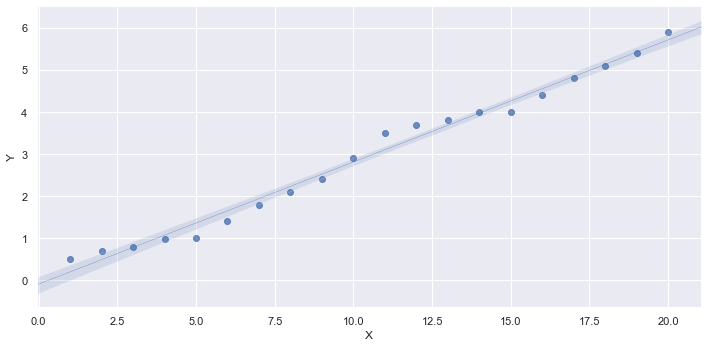

In [22]:
# A:
import seaborn as sns

sns.set(rc={"lines.linewidth": 0.2})
sns.lmplot(x='X', y='Y', data=df, aspect=2);

### Import PolynomialFeatures from sklearn. Then do the following:

- Instantiate a PolynomialFeatures object and save it as poly
- Documentation is [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
- Use degree=5 (Hint: If that gives you more than 6 columns, you forgot to remove something)
- Use fit_transform on X to create a numpy array of polynomial features
- Save that array as poly_feats
- Convert this array to a DataFrame and save it as poly_X
- Join this new poly_df DataFrame with df['Y'] using pd.merge (Hint: join on the index)
- Save this joined index as pdf

In [28]:
# A:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
X_reshape = df.X.values.reshape(-1,1)
poly_feats = poly.fit_transform(X_reshape)
poly_feats

array([[1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00],
       [1.000000e+00, 2.000000e+00, 4.000000e+00, 8.000000e+00,
        1.600000e+01, 3.200000e+01],
       [1.000000e+00, 3.000000e+00, 9.000000e+00, 2.700000e+01,
        8.100000e+01, 2.430000e+02],
       [1.000000e+00, 4.000000e+00, 1.600000e+01, 6.400000e+01,
        2.560000e+02, 1.024000e+03],
       [1.000000e+00, 5.000000e+00, 2.500000e+01, 1.250000e+02,
        6.250000e+02, 3.125000e+03],
       [1.000000e+00, 6.000000e+00, 3.600000e+01, 2.160000e+02,
        1.296000e+03, 7.776000e+03],
       [1.000000e+00, 7.000000e+00, 4.900000e+01, 3.430000e+02,
        2.401000e+03, 1.680700e+04],
       [1.000000e+00, 8.000000e+00, 6.400000e+01, 5.120000e+02,
        4.096000e+03, 3.276800e+04],
       [1.000000e+00, 9.000000e+00, 8.100000e+01, 7.290000e+02,
        6.561000e+03, 5.904900e+04],
       [1.000000e+00, 1.000000e+01, 1.000000e+02, 1.000000e+03,
        1.000000e+04, 1.000

In [29]:
# A:
poly_X = pd.DataFrame(data = poly_feats)
poly_X

,0,1,2,3,4,5
0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0,16.0,32.0
2,1.0,3.0,9.0,27.0,81.0,243.0
3,1.0,4.0,16.0,64.0,256.0,1024.0
4,1.0,5.0,25.0,125.0,625.0,3125.0
5,1.0,6.0,36.0,216.0,1296.0,7776.0
6,1.0,7.0,49.0,343.0,2401.0,16807.0
7,1.0,8.0,64.0,512.0,4096.0,32768.0
8,1.0,9.0,81.0,729.0,6561.0,59049.0
9,1.0,10.0,100.0,1000.0,10000.0,100000.0


In [33]:
# A:
pdf = pd.merge(df.Y, poly_X, left_index=True, right_index=True)
pdf

,Y,0,1,2,3,4,5
0,0.50,1.0,1.0,1.0,1.0,1.0,1.0
0,3.50,1.0,1.0,1.0,1.0,1.0,1.0
1,0.70,1.0,2.0,4.0,8.0,16.0,32.0
1,3.70,1.0,2.0,4.0,8.0,16.0,32.0
2,0.80,1.0,3.0,9.0,27.0,81.0,243.0
2,3.80,1.0,3.0,9.0,27.0,81.0,243.0
3,0.99,1.0,4.0,16.0,64.0,256.0,1024.0
3,3.99,1.0,4.0,16.0,64.0,256.0,1024.0
4,1.00,1.0,5.0,25.0,125.0,625.0,3125.0
4,4.00,1.0,5.0,25.0,125.0,625.0,3125.0


### Using statsmodels as before, fit this new model and save it as poly_results

In [37]:
# A:
model = sm.OLS(pdf.Y,poly_feats)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     1.299
Date:                Mon, 27 Jan 2020   Prob (F-statistic):              0.319
Time:                        17:29:45   Log-Likelihood:                -34.988
No. Observations:                  20   AIC:                             81.98
Df Residuals:                      14   BIC:                             87.95
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0132      3.697     -0.274      0.788      -8.942       6.916
x1             2.5728      3.243      0.793      0.441      -4.383       9.528
x2            -0.6796      0.901     -0.755      0.463      -2.611       1.252
x3             0.0786      0.106      0.743      0.470      -0.148       0.305
x4            -0.0040      0.005     -0.733      0.476      -0.016       0.008
x5          7.586e-05      0.000      0.728      0.479      -0.000       0.000
==============================================================================
Omnibus:                       29.710   Durbin-Watson:                   3.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                2.912
Skew:                           0.000   Prob(JB):                        0.233
Kurtosis:                       1.131   Cond. No.                     1.46e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Print out the model's predictions and save them as poly_yhat

In [38]:
# A:
poly_yhat = results.predict(poly_feats)
df['Y_predict_poly'] = pd.Series(poly_yhat)
df

,X,Y,predict,Y_predict_poly
0,1,0.50,0.204286,0.954733
1,2,0.70,0.494256,1.980726
2,3,0.80,0.784226,2.402566
3,4,0.99,1.074195,2.479538
4,5,1.00,1.364165,2.401577
5,6,1.40,1.654135,2.298371
6,7,1.80,1.944105,2.248463
7,8,2.10,2.234075,2.288358
8,9,2.40,2.524045,2.421624
9,10,2.90,2.814015,2.627996


### Calculate the SSE

In [45]:
# A:
yhat_mse = metrics.mean_squared_error(df.Y, poly_yhat)
print(yhat_mse)
yhat_sse = yhat_mse * len(df)
yhat_sse

0.8121190620712291


16.24238124142458

### Now, create a for loop that does the follow:

- Iterates over the following alpha values [0, .001, .01, .25, .5, 1, 10]
- In each loop, you are going to fit a regularized regression
- See [Statsmodels Docs](http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLS.fit_regularized.html) to understand how to do this
- In each loop, set the value of alpha to the value of being iterated over
- Set the L1_wt parameter to 0
- In each loop print out the alpha value, the SSE, and the mean absolute value of the coefficient of the model
- You should also print out the predictions as a line and the true y's as a scatterplot as above

In [23]:
# A:

### Using the output of the above, answer the following:
- What happens to the SSE over the increasing alpha values?
- What happens to the mean abs. value of the coefficients?
- Does increasing the bias to reduce variance always mean a better model?

In [24]:
# A:

In [25]:
# A:

In [26]:
# A: